In [2]:
import cv2
import numpy as np
from PIL import Image
from rembg import remove

import matplotlib.pyplot as plt

In [3]:
# !rembg i path/img path/to/result
with open("/opt/ml/data/mixed/mask.txt", "r") as f:
    lines = f.readlines()
f.close()
lines = [line.rstrip('\n') for line in lines]

path = "/opt/ml/data/"

for i in range(200):

    input_path = path + lines[i] # input image path
    output_path = '/opt/ml/data/mixed/output_image/' # output image path

    input = Image.open(input_path) # load image
    output = remove(input) # remove background
    
    num = str(i)
    add_zero_num = 4 - len(num)
    num = "0" * add_zero_num + num
    
    output.save(output_path + f"mask_{num}.png", "png") # save image

In [4]:

with open("/opt/ml/data/mixed/bg.txt", "r") as f:
    lines = f.readlines()
f.close()
lines = [line.rstrip('\n') for line in lines]

for i in range(200):
    num = str(i)
    add_zero_num = 4 - len(num)
    num = "0" * add_zero_num + num
    image1 = Image.open(f"/opt/ml/data/mixed/output_image/mask_{num}.png")
    
    image2 = Image.open(path + lines[i])
    
    image2.paste(image1, (0, 0), image1)
    
    # image2.save(f"/opt/ml/data/mixed/mixed_image/mixed_{num}.jpg", "jpg")
    # dst = cv2.addWeighted(image1, 1.0, image2, 0.0, gamma=1)
    # # dst = cv2.add(image2, image1)
    # image = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    # # plt.imshow(image)
    image2.save(f"/opt/ml/data/mixed/mixed_images/mixed_{num}.jpg")


# image1 = cv2.imread("/opt/ml/output2.png")
# image2 = cv2.imread(
#     "/opt/ml/data/test/images/dccbdc99-pangyo-demo-hik-208_1661334617.mp4_165.jpg",
# )

# dst = cv2.addWeighted(image1, 1.0, image2, 0.0, gamma=1)
# # dst = cv2.add(image2, image1)
# image = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# plt.imshow(image)

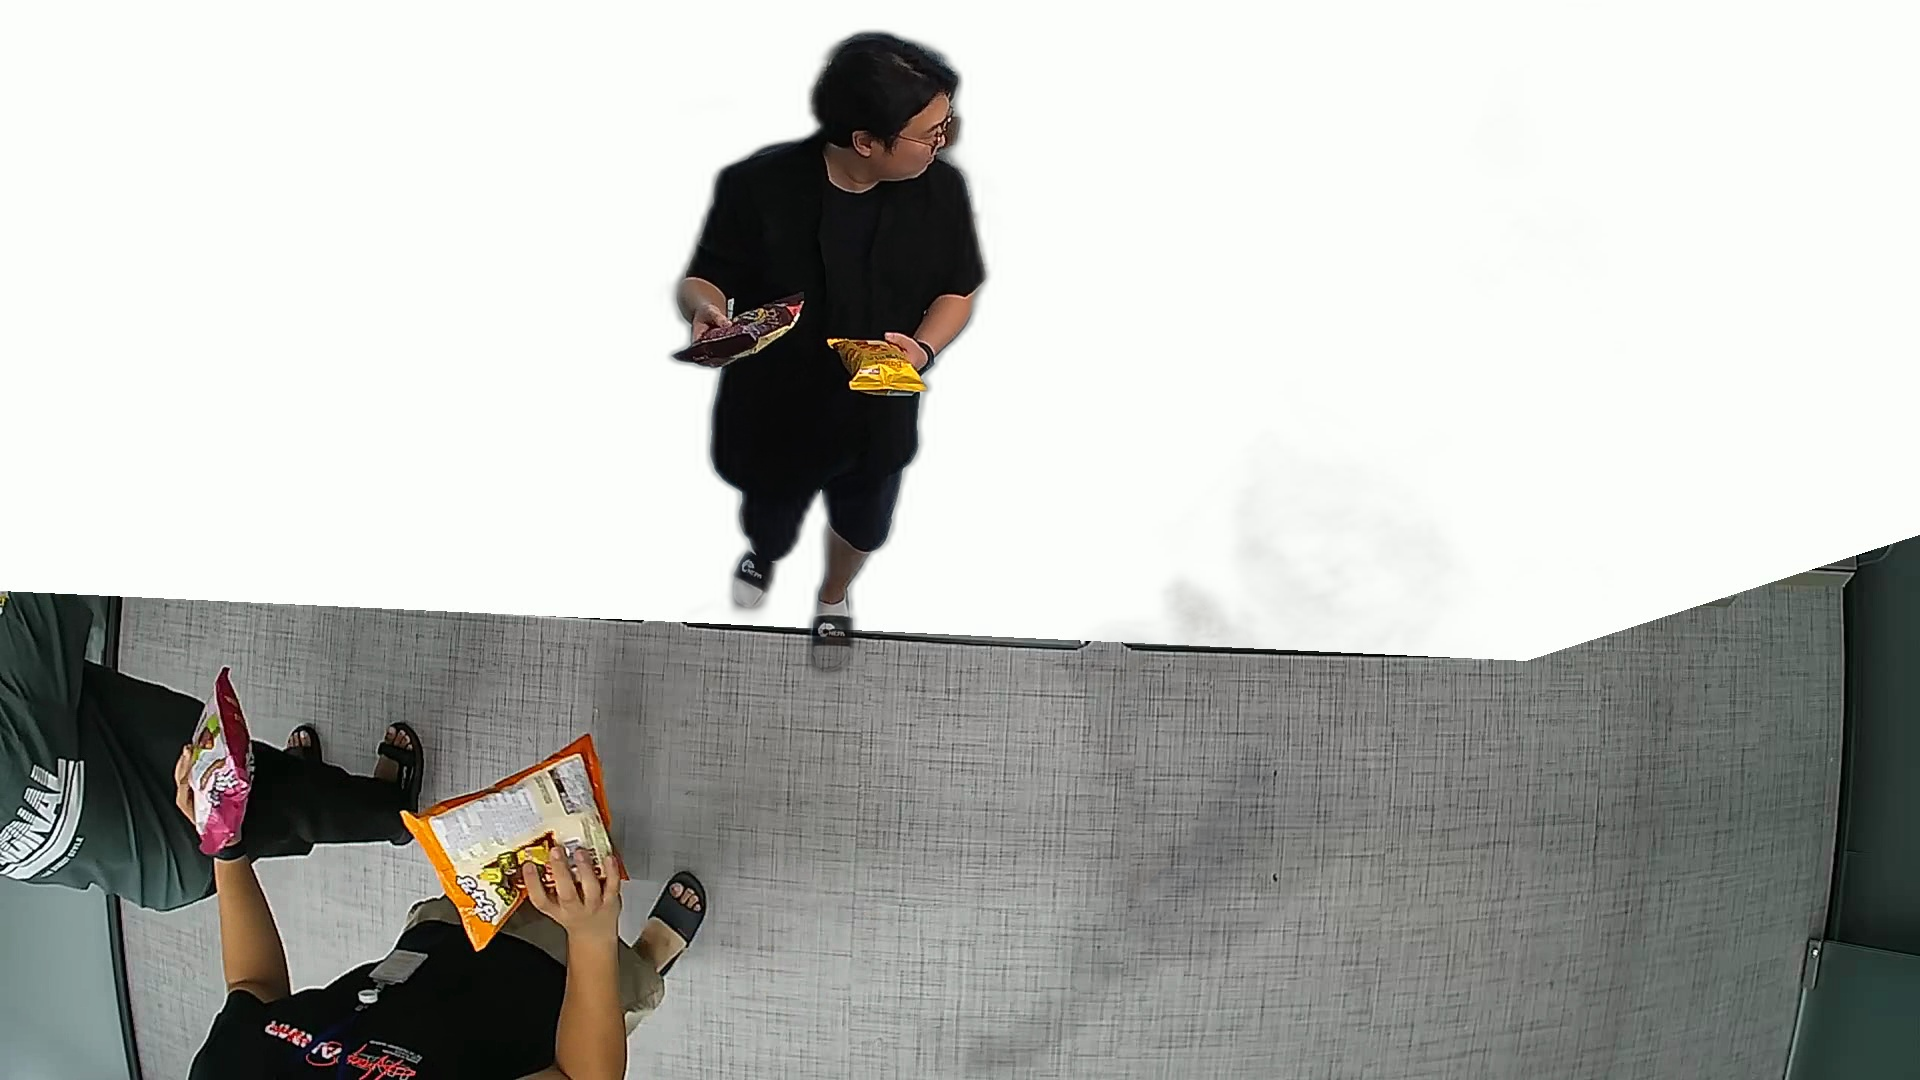

In [17]:
image1 = Image.open("/opt/ml/train3.png")
image2 = Image.open(
    "/opt/ml/data/test/images/dccbdc99-pangyo-demo-hik-208_1661334617.mp4_165.jpg",
)

image2.paste(image1, (0, 0), image1)
image2.show()